# **Ajio EDA Analysis**

In [108]:
# Import pandas for data manipulation
import pandas as pd # to import data use pandas

customers = pd.read_csv('customer.csv')  #to call csv file in pandas dataframe
delivery = pd.read_csv('delivery.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
rating = pd.read_csv('ratings.csv')
returns = pd.read_csv('returns.csv')
transactions = pd.read_csv('transaction.csv')

In [109]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   C_ID            10000 non-null  object
 1   C_Name          10000 non-null  object
 2   Gender          10000 non-null  object
 3   Age             10000 non-null  int64 
 4   City            10000 non-null  object
 5   State           10000 non-null  object
 6   Street_Address  10000 non-null  object
 7   Mobile          10000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


In [110]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Or_ID       10000 non-null  object
 1   C_ID        10000 non-null  object
 2   P_ID        10000 non-null  object
 3   Order_Date  10000 non-null  object
 4   Order_Time  10000 non-null  object
 5   Qty         10000 non-null  int64 
 6   Coupon      10000 non-null  object
 7   DP_ID       10000 non-null  object
 8   Discount    10000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


In [111]:
orders.describe()

,Qty,Discount
count,10000.000000,10000.000000
mean,5.513600,9.066700
std,2.882195,11.828941
min,1.000000,0.000000
25%,3.000000,0.000000
50%,6.000000,0.000000
75%,8.000000,15.000000
max,10.000000,50.000000


In [112]:
# Find the average rating for each product.
average_ratings = rating.groupby('Or_ID')['Prod_Rating'].mean().reset_index()
display(average_ratings)

,Or_ID,Prod_Rating
0,OR_31000001,1.000000
1,OR_31000002,3.500000
2,OR_31000004,3.000000
3,OR_31000005,4.000000
4,OR_31000009,2.000000
...,...,...
6302,OR_31009991,2.500000
6303,OR_31009993,3.000000
6304,OR_31009995,4.500000
6305,OR_31009997,5.000000


In [113]:
transactions.describe()

,Tr_ID,Or_ID,Transaction_Mode,Reward
count,10000,10000,10000,10000
unique,10000,6248,5,2
top,TR_41009984,OR_31004020,Net Banking,No
freq,1,6,2057,5024


In [114]:
transactions.head()

,Tr_ID,Or_ID,Transaction_Mode,Reward
0,TR_41000001,OR_31002037,Wallet,No
1,TR_41000002,OR_31008376,Wallet,Yes
2,TR_41000003,OR_31002152,UPI,No
3,TR_41000004,OR_31009239,Credit Card,Yes
4,TR_41000005,OR_31002891,Debit Card,No


In [115]:
transactions.tail()

,Tr_ID,Or_ID,Transaction_Mode,Reward
9995,TR_41009996,OR_31000163,UPI,Yes
9996,TR_41009997,OR_31002044,Wallet,Yes
9997,TR_41009998,OR_31004604,UPI,Yes
9998,TR_41009999,OR_31001672,Wallet,No
9999,TR_41010000,OR_31005370,Wallet,No


In [116]:
products.describe()

,Price
count,10000.000000
mean,1754.920300
std,714.960007
min,500.000000
25%,1139.000000
50%,1766.500000
75%,2370.000000
max,3000.000000


In [117]:
#to check for null in your dataframe
orders.isnull().sum()
transactions.isnull().sum()
customers.isnull().sum()
rating.isnull().sum()
returns.isnull().sum()
delivery.isnull().sum()
products.isnull().sum()

,0
P_ID,0
P_Name,0
Category,0
Company_Name,0
Gender,0
Price,0


In [118]:

'''if there are null values: there are following way to remove null
 drop nulls - (loss of data)
 fill nulls - (constant, mean, mode, median, ffill, bfill)
            - if numberic col, use Median
            - if textual col, use Mode
            - backward fill and forward fill

assuming quantity has null values '''

orders["Qty"] = orders["Qty"].fillna(orders["Qty"].median()) #mean() or mode()
orders["Qty"] = orders["Qty"].ffill() #bfill

In [119]:
#to check for duplicates in your dataframe
orders.duplicated().sum()
transactions.duplicated().sum()
customers.duplicated().sum()
rating.duplicated().sum()
returns.duplicated().sum()
delivery.duplicated().sum()
products.duplicated().sum()

np.int64(0)

In [120]:
#if there are any duplicated values then use

orders = orders.drop_duplicates()
orders

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25
2,OR_31000003,CS_11001042,PD_21004315,2024-09-22,17:26:05,1,No Coupon,DV_61000002,0
3,OR_31000004,CS_11004079,PD_21007443,2023-05-26,03:15:48,10,AGREEMENT,DV_61000003,10
4,OR_31000005,CS_11009894,PD_21007621,2023-10-26,04:02:44,7,WINDOW,DV_61000001,10
...,...,...,...,...,...,...,...,...,...
9995,OR_31009996,CS_11004842,PD_21004878,2024-11-14,18:20:50,5,MILLION,DV_61000005,15
9996,OR_31009997,CS_11005966,PD_21000725,2023-05-15,03:02:18,4,No Coupon,DV_61000002,0
9997,OR_31009998,CS_11003081,PD_21002144,2024-12-28,17:50:17,6,No Coupon,DV_61000002,0
9998,OR_31009999,CS_11006873,PD_21005870,2024-07-15,20:24:29,6,EVERY,DV_61000005,20


In [121]:
#to join two tables together, merge function is used

merged_cust_ord = pd.merge(right = customers, left = orders, how = "inner", on = "C_ID" )
merged_cust_ord


,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount,C_Name,Gender,Age,City,State,Street_Address,Mobile
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0,Balvan Mahajan,Male,67,Mumbai,Maharashtra,"Pine St, 193 , Mumbai , Maharashtra - 421437",9791758370
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25,Vincent Sinha,Female,59,Bengaluru,Karnataka,"2nd St, 70 , Bengaluru , Karnataka - 643723",9794196797
2,OR_31000003,CS_11001042,PD_21004315,2024-09-22,17:26:05,1,No Coupon,DV_61000002,0,Yagnesh Narang,Male,44,Delhi,Delhi,"3rd St, 771 , Delhi , Delhi - 234707",9047562688
3,OR_31000004,CS_11004079,PD_21007443,2023-05-26,03:15:48,10,AGREEMENT,DV_61000003,10,Jack Yadav,Female,57,Ghaziabad,Uttar Pradesh,"Main St, 626 , Ghaziabad , Uttar Pradesh - 215466",9002314381
4,OR_31000005,CS_11009894,PD_21007621,2023-10-26,04:02:44,7,WINDOW,DV_61000001,10,Raagini Sridhar,Male,28,Visakhapatnam,Andhra Pradesh,"Elm St, 760 , Visakhapatnam , Andhra Pradesh -...",9263883766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,OR_31009996,CS_11004842,PD_21004878,2024-11-14,18:20:50,5,MILLION,DV_61000005,15,Tanay Thaker,Female,58,Ghaziabad,Uttar Pradesh,"Pine St, 27 , Ghaziabad , Uttar Pradesh - 610729",9246855141
9996,OR_31009997,CS_11005966,PD_21000725,2023-05-15,03:02:18,4,No Coupon,DV_61000002,0,Hemang Nanda,Female,23,Thane,Maharashtra,"Park Ave, 720 , Thane , Maharashtra - 842045",9116830529
9997,OR_31009998,CS_11003081,PD_21002144,2024-12-28,17:50:17,6,No Coupon,DV_61000002,0,Pahal Guha,Male,56,Hyderabad,Telangana,"Pine St, 463 , Hyderabad , Telangana - 182547",9957248264
9998,OR_31009999,CS_11006873,PD_21005870,2024-07-15,20:24:29,6,EVERY,DV_61000005,20,Unni Saini,Female,52,Chennai,Tamil Nadu,"Oak St, 587 , Chennai , Tamil Nadu - 353497",9099364218


In [122]:
merged_Prod_ord = pd.merge(right = products, left = orders, how = "inner", on = "P_ID" )
merged_Prod_ord


,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount,P_Name,Category,Company_Name,Gender,Price
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0,Relaxed Fit Poly-Cotton Olive Green Patchwork ...,Jeans,Uniqlo,Women,2300
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25,Relaxed Fit Raw Denim Black Ripped Jeans,Jeans,Pantaloons,Women,631
2,OR_31000003,CS_11001042,PD_21004315,2024-09-22,17:26:05,1,No Coupon,DV_61000002,0,Board Cotton Dark Green Solid Shorts,Shorts,Levi's,Unisex,836
3,OR_31000004,CS_11004079,PD_21007443,2023-05-26,03:15:48,10,AGREEMENT,DV_61000003,10,Double-Breasted Velvet Navy Blue Geometric Blazer,Blazer,Uniqlo,Unisex,847
4,OR_31000005,CS_11009894,PD_21007621,2023-10-26,04:02:44,7,WINDOW,DV_61000001,10,Crew Neck Cotton Beige Checkered T-Shirt,T-Shirt,Gap,Unisex,2231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,OR_31009996,CS_11004842,PD_21004878,2024-11-14,18:20:50,5,MILLION,DV_61000005,15,Graphic Mesh Maroon Checkered T-Shirt,T-Shirt,Adidas,Unisex,1674
9996,OR_31009997,CS_11005966,PD_21000725,2023-05-15,03:02:18,4,No Coupon,DV_61000002,0,Blazer Leather Navy Blue Textured Jacket,Jacket,Reebok,Men,689
9997,OR_31009998,CS_11003081,PD_21002144,2024-12-28,17:50:17,6,No Coupon,DV_61000002,0,Pencil Linen Gray Solid Skirt,Skirt,Zara,Men,2012
9998,OR_31009999,CS_11006873,PD_21005870,2024-07-15,20:24:29,6,EVERY,DV_61000005,20,Midi Polyester Beige Floral Skirt,Skirt,Zara,Men,1892


In [123]:
merged_trans_ord = pd.merge(right = merged_Prod_ord, left = transactions, how = "inner", on = "Or_ID" )
merged_trans_ord

,Tr_ID,Or_ID,Transaction_Mode,Reward,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount,P_Name,Category,Company_Name,Gender,Price
0,TR_41000001,OR_31002037,Wallet,No,CS_11008768,PD_21002236,2024-07-31,10:29:19,2,CUT,DV_61000002,15,Bomber Denim Navy Blue Ribbed Jacket,Jacket,Levi's,Women,922
1,TR_41000002,OR_31008376,Wallet,Yes,CS_11009715,PD_21002423,2023-09-01,07:25:04,6,No Coupon,DV_61000004,0,Midi Cotton Olive Green Printed Skirt,Skirt,Puma,Men,2838
2,TR_41000003,OR_31002152,UPI,No,CS_11004712,PD_21007634,2023-03-10,16:48:31,5,No Coupon,DV_61000003,0,Mini Denim Black Colorblock Dress,Dress,H&M,Men,598
3,TR_41000004,OR_31009239,Credit Card,Yes,CS_11002565,PD_21005533,2023-11-18,22:18:59,4,No Coupon,DV_61000004,0,Slim Fit Jersey Beige Colorblock T-Shirt,T-Shirt,Adidas,Women,2037
4,TR_41000005,OR_31002891,Debit Card,No,CS_11007058,PD_21003214,2023-09-21,01:56:43,3,WIFE,DV_61000004,10,Relaxed Fit Cotton Navy Blue Ribbed Shorts,Shorts,Zara,Unisex,2540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TR_41009996,OR_31000163,UPI,Yes,CS_11005363,PD_21006155,2023-05-17,22:47:49,2,FOR,DV_61000001,25,Slim Fit Tencel Maroon Striped T-Shirt,T-Shirt,Adidas,Men,1361
9996,TR_41009997,OR_31002044,Wallet,Yes,CS_11007814,PD_21009534,2024-10-30,09:07:36,2,No Coupon,DV_61000003,0,Silk Gray Striped Shorts,Jacket,Adidas,Unisex,692
9997,TR_41009998,OR_31004604,UPI,Yes,CS_11004676,PD_21005182,2023-06-26,06:02:34,5,No Coupon,DV_61000005,0,Athletic Nylon Brown Camouflage Hoodie,Hoodie,Reebok,Men,525
9998,TR_41009999,OR_31001672,Wallet,No,CS_11003499,PD_21005551,2024-01-22,01:31:17,4,PHYSICAL,DV_61000005,25,Pleated Polyester White Geometric Skirt,Skirt,Gap,Men,2471


In [124]:
# to create monthly revenue

# Ensure the 'Order_Date' column in the 'merged_trans_ord' dataframe is in datetime format
merged_trans_ord['Order_Date'] = pd.to_datetime(merged_trans_ord['Order_Date'])

# Extract year and month
merged_trans_ord['YearMonth'] = merged_trans_ord['Order_Date'].dt.to_period('M')

# Calculate the total amount for each transaction
merged_trans_ord['Amount'] = merged_trans_ord['Qty'] * merged_trans_ord['Price']

# Calculate monthly revenue
monthly_revenue = merged_trans_ord.groupby('YearMonth')['Amount'].sum().reset_index()

# Display the monthly revenue
print("Monthly Revenue:")
display(monthly_revenue)

Monthly Revenue:


,YearMonth,Amount
0,2023-01,4030066
1,2023-02,3623943
2,2023-03,3977682
3,2023-04,3953592
4,2023-05,4344696
5,2023-06,4265194
6,2023-07,4065106
7,2023-08,3591278
8,2023-09,3728335
9,2023-10,4387387


In [125]:
#group by is used to summarize data i.e., it creates pivot tables
gb = merged_cust_ord.groupby("State").agg({"Or_ID":"count"})
gb = gb.sort_values(by = "Or_ID", ascending= False) #sort data in desc by total_orders
gb


,Or_ID
State,
Maharashtra,1994
Gujarat,1551
Uttar Pradesh,1487
Madhya Pradesh,977
Andhra Pradesh,554
Tamil Nadu,541
Telangana,513
Bihar,510
West Bengal,490


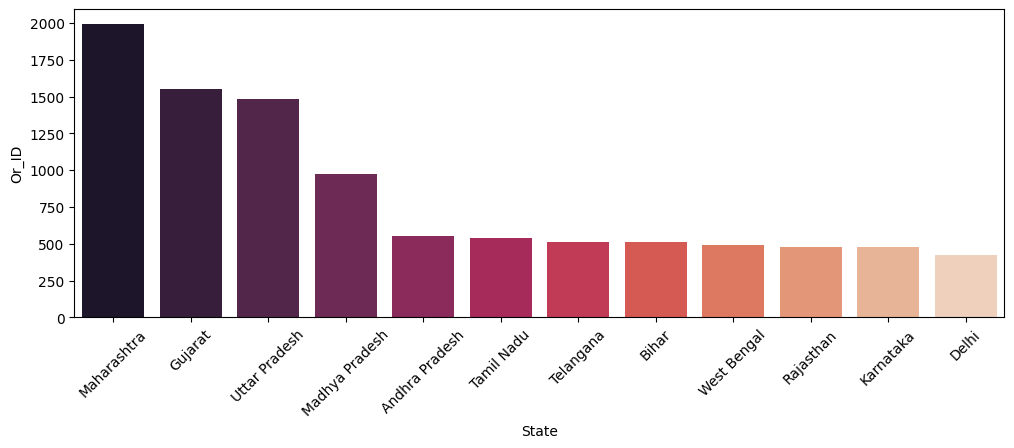

In [126]:
# Import matplotlib & seaborn for data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,4))
sns.barplot(x = gb.index, y = "Or_ID", data = gb, hue = gb.index, palette = "rocket")
plt.xticks(rotation = 45)
plt.show()

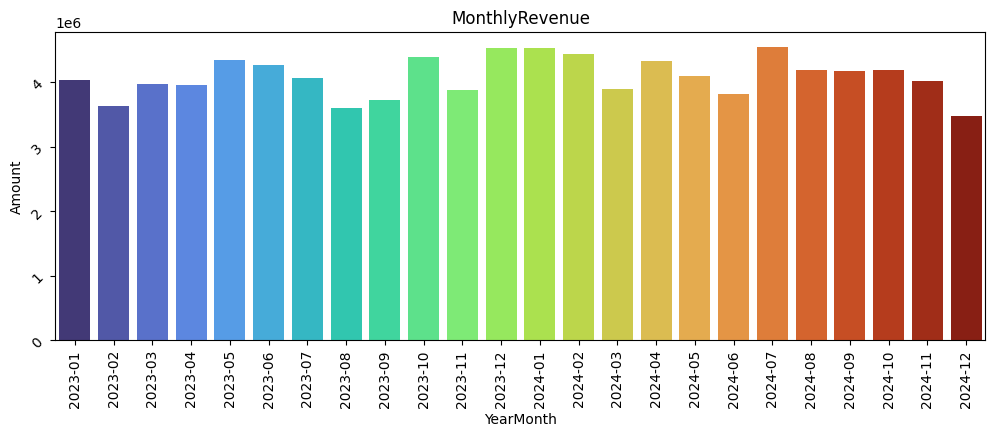

In [127]:
#Create a bar chart showing monthly revenue trends.
plt.figure(figsize = (12,4))
sns.barplot(x = "YearMonth"	, y = "Amount", data = monthly_revenue , hue = "YearMonth", palette = "turbo")
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.title("MonthlyRevenue")
plt.show()

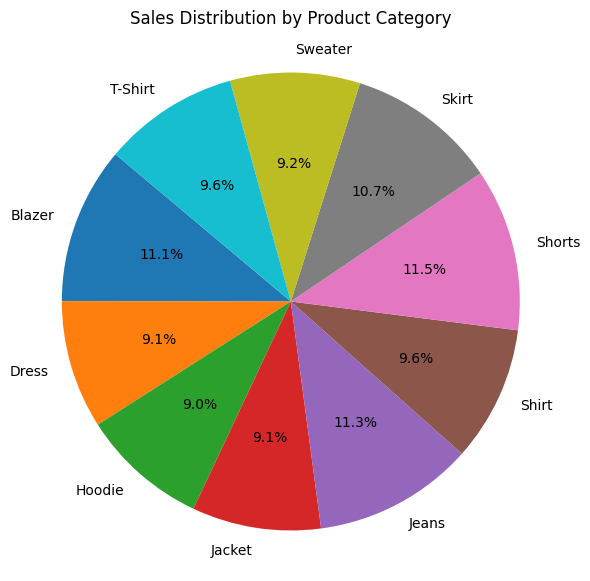

In [128]:
# Show a pie chart of sales distribution by product category.

# Calculate total sales amount per product category
category_sales = merged_trans_ord.groupby('Category')['Amount'].sum().reset_index()

# Plot a pie chart
plt.figure(figsize=(6.5, 7))
plt.pie(category_sales['Amount'], labels=category_sales['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

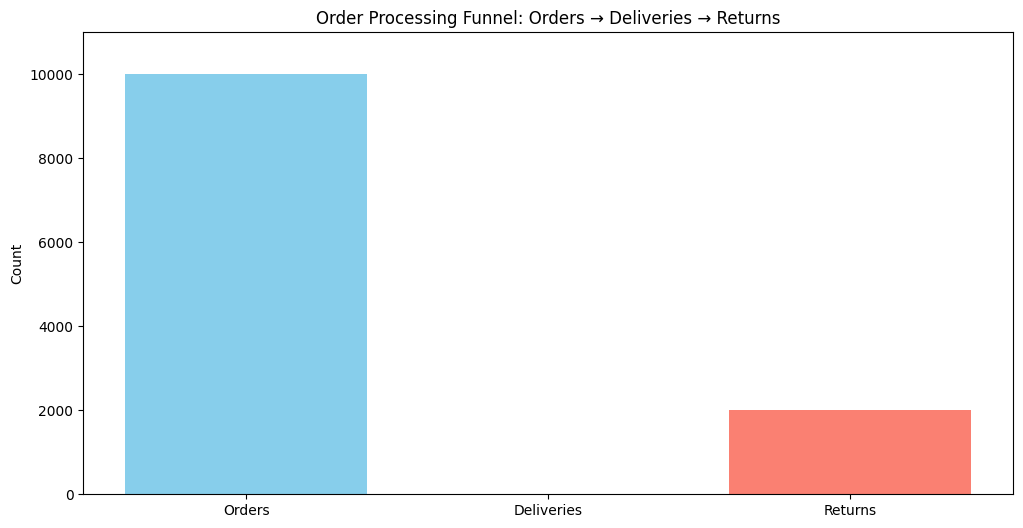

In [129]:
# prompt: Create a funnel chart showing number of orders → deliveries → returns.

# Calculate the number of orders, deliveries, and returns
num_orders = len(orders)
num_deliveries = len(delivery)
num_returns = len(returns)

# Create the data for the funnel chart
funnel_data = {'Stage': ['Orders', 'Deliveries', 'Returns'],
               'Count': [num_orders, num_deliveries, num_returns]}
funnel_df = pd.DataFrame(funnel_data)

# Create the funnel chart
plt.figure(figsize=(12, 6))
plt.bar(funnel_df['Stage'], funnel_df['Count'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Order Processing Funnel: Orders → Deliveries → Returns')
plt.ylabel('Count')
plt.ylim(0, max(funnel_df['Count']) * 1.1) # Add some padding to the y-axis
plt.show()